In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy as sp

# 線形回帰モデル

横軸（x軸）が授業で出るレポートの負荷量，縦軸（y軸）が過去5年の平均受講者数だとしましょう．（どうやって測るのかは知りません．架空のデータです．）
20の授業があって，その分布が以下のようになっているとします．

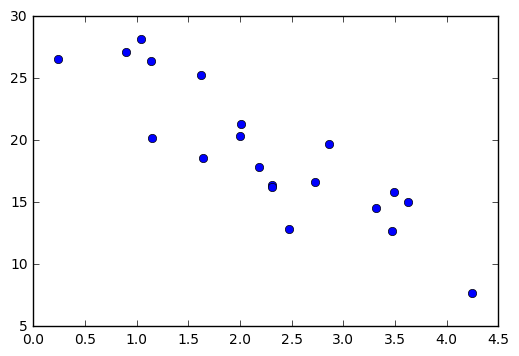

In [3]:
n = 20
datax = np.abs(2 + np.random.randn(n))
datay = 30 + -4.8 * datax + 2 * np.random.randn(n)
plt.plot(datax, datay, 'o')

ある授業のレポート負荷量（x）がわかったときに，受講者数（y）を予測する線形回帰モデルを立てます．

$y = wx + b$

ここで，wとbはパラメータです．
とりあえず，上のグラフを見て，右下にデータが傾いているので，$w = -2$, $b = 25$ と適当に決めてみたとしましょう．
このモデルによる予測と，実際のデータ $\mathbf{x} = (x_1,...,x_{20}), \mathbf{y} = (y_1,...,y_{20})$ との誤差を平均二乗誤差（Mean Square Error）で定義することにしましょう．

$MSE = \sum_{i=1}^{20} \left( y_i - (wx_i + b) \right)^2$

In [4]:
def loss_linear_regression(datax, datay, w, b):
    return np.sum(np.square(datay[i] - (w * datax[i] + b)) for i in range(len(datax)))

えいや，と決めたwとbで直線を描いて見ると以下のようになります．
しかし，当てはまりはイマイチです．
どのくらいの誤差があるのかをグラフの下に出力しています．

そこで，wを微調整しようと思います．
wを-5にしたときのMSE，wを-4.5にしたときのMSE，wを-4にしたときのMSE，...，wを0にしたときのMSE，をそれぞれ計算してみて，グラフにプロットしてみたのが次のグラフです．
これを見るとwを-3よりちょっと小さいぐらいに設定すると当てはまりがもっと良くなりそうだということが分かりますね．

その下には，同様にbをちょっとずつ変えてMSEを計算した結果のプロットを出力しています．

Jupyter notebookをインストールしてある環境にいる方は，下のセルのwとbの値をもっと良さそうな値に変えて実行し直してみてください．

In [5]:
w = -2.0
b = 25.0

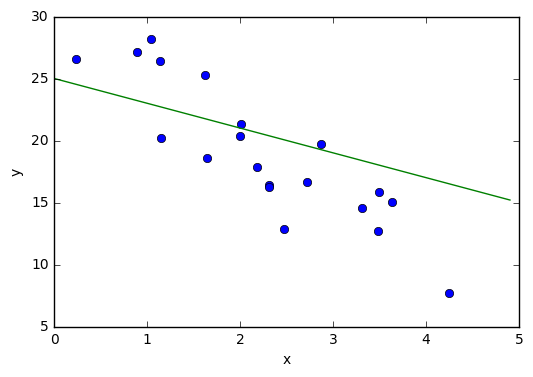

MSE = 322.684850205


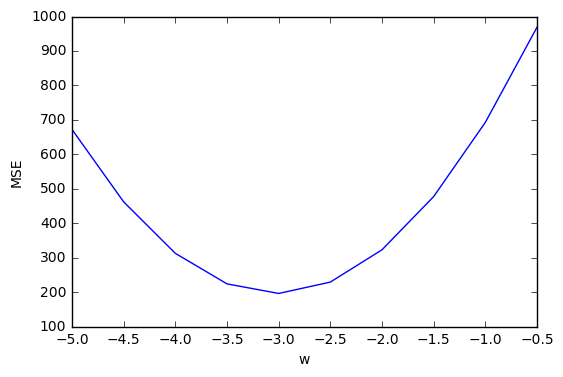

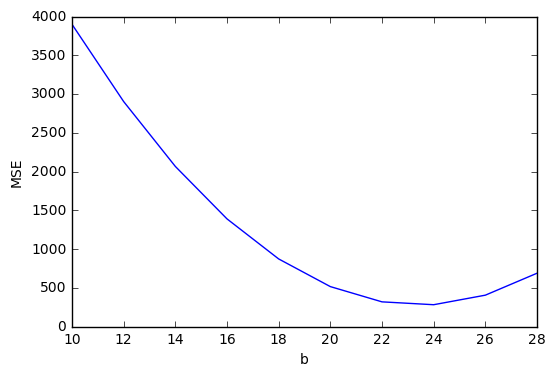

In [6]:
plt.plot(datax, datay, 'o')

x = np.arange(0, 5, 0.1)
y = w * x + b
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print('MSE =', loss_linear_regression(datax, datay, w, b))

w_f = np.arange(-5, 0, 0.5)
b_f = b
loss = loss_linear_regression(datax, datay, w_f, b_f)
plt.plot(w_f, loss)
plt.xlabel("w")
plt.ylabel("MSE")
plt.show()

w_f = w
b_f = np.arange(10, 30, 2)
loss = loss_linear_regression(datax, datay, w_f, b_f)
plt.plot(b_f, loss)
plt.xlabel("b")
plt.ylabel("MSE")
plt.show()

さて，こんな感じでwとbを微調整することぐらいコンピュータにもできそうです．
しかし，上のようなグラフを1回書くのに，wとbを微調整して100回以上もMSEを計算しています．
パラメータがwとbの2つしかないなら，こんなしらみつぶし攻撃でも通用しそうですが，もっとパラメータが増えたときに破綻するでしょう．
（例えば，講義テーマの流行度とか，先生の優しさなど，特徴量が増えたとき．自然言語処理では数万の語彙それぞれに対応したwを用意して調整する必要があるかもしれません．）

そこで勾配法です．
勾配法では，上のグラフのうち，今とりあえず暫定的に決まっているwの値である $-2$ の周辺だけMSEを計算して，もし右肩下がりだったらwをちょっとだけ増やし，左肩下がりだったらwをちょっとだけ減らす，ということを繰り返します．（bも同様です．）

つまり，$h$ を小さい数（例えば0.001）として，$-2 + h$ の時のMSE $MSE(-2+h)$ と，$-2 - h$ の時のMSE $MSE(-2-h)$ を計算して，$MSE(-2+h) - MSE(-2-h)$ が正の値であれば左肩が下がっているということだし，負の値であれば右肩が下がっているということです．
だから，この差をwから直接引くことにすれば，下がっている方向に微調整ができます．
ただし，これはhの設定次第で大きくなったり小さくなったりし得る値なので，左右の長さである $2h$ で割ります．

$ w' = w - \alpha \frac{MSE(w+h) - MSE(w-h)}{2h} $

ここで，$\alpha$ は0.01ぐらいの値で，学習率と呼ばれます．
wが一気に吹っ飛んでしまわないようにするためのものです．

なお，これは微小にwを動かした時のMSEの値の変化量なので，これは関数MSEのwでの偏微分であり，求めたのは接線の傾き（勾配）の近似に他なりません．
これが勾配法と呼ばれる所以です．

$ \frac{\partial MSE(w)}{\partial w} \approx \frac{MSE(w+h) - MSE(w-h)}{2h} $

以下では，この微調整をwとbについて30回繰り返した結果たどり着いたwとbの値と，その時の直線の当てはめを出力しています．
かなり当てはめがいい直線になっていることが分かります．
それもそのはず，MSEが小さい方へ，小さい方へとパラメータを移動していったのですから．

w : -4.48332220122  b: 26.607519411  loss: 249.122677993
w : -2.36661151595  b: 25.6770812942  loss: 276.616261471
w : -4.56452475961  b: 27.0864634169  loss: 222.024028643
w : -2.67910591797  b: 26.2442030735  loss: 242.033992792
w : -4.6247770334  b: 27.4806763227  loss: 201.471433665
w : -2.94574448341  b: 26.7194345237  loss: 215.9888179
w : -4.66842601345  b: 27.8048912106  loss: 185.814325346
w : -3.17349239469  b: 27.1178509568  loss: 196.311049053
w : -4.69899432576  b: 28.0713068397  loss: 173.83722644
w : -3.36822641428  b: 27.4520327014  loss: 181.39879895
w : -4.71932948926  b: 28.2900206008  loss: 164.64016283
w : -3.53490876108  b: 27.7324805353  loss: 170.065174786
w : -4.73172685498  b: 28.469387835  loss: 157.553147315
w : -3.6777327506  b: 27.9679616586  loss: 161.427655015
w : -4.73803079388  b: 28.6163200046  loss: 152.0747477
w : -3.80024483863  b: 28.1657978538  loss: 154.827743292
w : -4.73971791549  b: 28.7365320891  loss: 147.827741667
w : -3.90544693936  b: 28

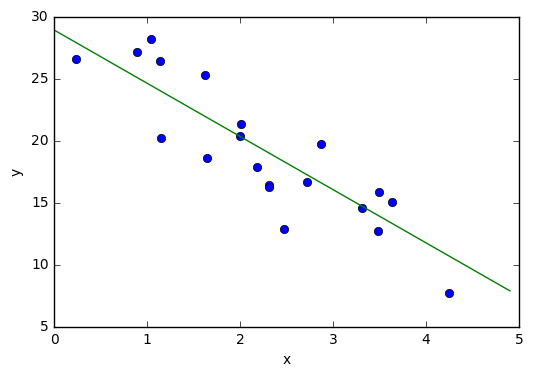

In [7]:
w = -2.0
b = 25.0

h = 0.0001
alpha = 0.01

for i in range(30):
    loss = loss_linear_regression(datax, datay, np.array([w - h, w + h]), b)
    diff = (loss[1] - loss[0]) / (2 * h)
    w = w - alpha * diff

    loss = loss_linear_regression(datax, datay, w, np.array([b - h, b + h]))
    diff = (loss[1] - loss[0]) / (2 * h)
    b = b - alpha * diff
    
    print('w :', w, ' b:', b, ' loss:', loss_linear_regression(datax, datay, w, b))

plt.plot(datax, datay, 'o')

x = np.arange(0, 5, 0.1)
y = w * x + b
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# ロジスティック回帰分類器

この「ベクトル空間上に直線を引く」という手法を直接2値分類に応用したのがロジスティック回帰です．

横軸 $x_1$ が授業で出るレポートの負荷量で，縦軸 $x_2$ が担当の先生の評価の厳しさだとします．40の授業があって，うち赤丸で表される授業は「将来役に立った授業」で，青いバツで表される授業は「あまり役に立たなかった授業」とします．これが以下のように分布していたとしましょう．

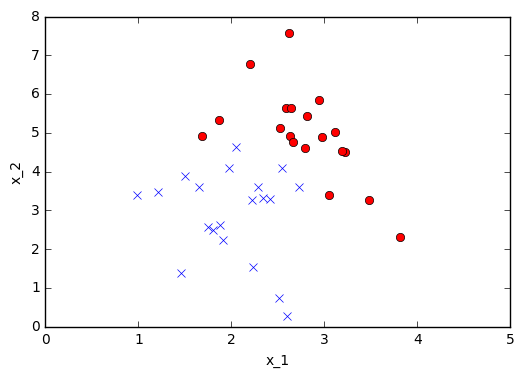

In [8]:
n = 20
x1p = np.abs(3 + np.random.randn(n) * 0.5)
x2p = np.abs(5 - x1p * np.random.randn(n) * 0.5)
x1n = np.abs(2 + np.random.randn(n) * 0.5)
x2n = np.abs(3 - x1n * np.random.randn(n) * 0.5)

xp = [(x1, x2) for x1, x2 in zip(x1p, x2p)]
xn = [(x1, x2) for x1, x2 in zip(x1n, x2n)]

plt.xlim(0, 5)
plt.ylim(0, 8)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.plot(x1p, x2p, 'ro')
plt.plot(x1n, x2n, 'bx')

この赤丸と青バツを分離するように，直線を引くことを考えます．傾きが $-2$ くらいで，切片が $8$ くらいの直線になりそうですので，$x_2 = -2x_1 + 8$ として直線を引いてみます．

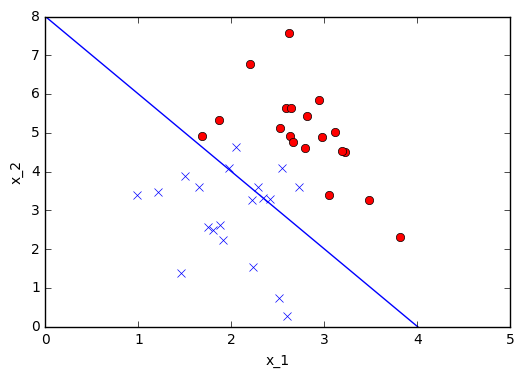

In [9]:
plt.xlim(0, 5)
plt.ylim(0, 8)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.plot(x1p, x2p, 'ro')
plt.plot(x1n, x2n, 'bx')

x = arange(0, 5, 0.1)
y = -2 * x + 8
plt.plot(x, y)

もう少しいい直線が引けるような気がしますが，この調整を線形回帰のように勾配法を使って行いたいと思います．今回は直線の当てはまりの良さではなく，よく分類できているかどうかが「誤差」に対応します．これは直線よりどのくらい上にあるか，下にあるかを数値化できれば定義できそうです．

今引いてみた直線は，全ての項を左辺に持っていくと以下のように表せます．

$ 2x_1 + x_2 - 8 = 0 $

これは，例えば座標 (2, 4) にある点がちょうど直線の上に乗っていることを意味しています．直線より上にある点 (3, 5) は $2 \times 3 + 5 - 8 = 3$ と正の値になりますし，直線より下にある点 (2, 3) は $2 \times 2 + 3 - 8 = -1$ のように負の値になります．
$f(x) = 2x_1 + x_2 - 8$ の大きさを見ればよいわけです．

ロジスティック回帰では，$f(x)$ が大きいほどクラス1に，小さいほどクラス2に割り当てる確率が高いような確率分布を考えます．絶対に0以下にならない関数として，$e^{f(x)}$ を用います．これは $f(x) = 0$ の時に $1$ になる関数ですから，この時に確率が1:1になるように，クラス1とクラス2が $e^{f(x)} : 1$ の割合になるような確率分布とします．確率は足して1にならないといけないので，これを正規化しますと，クラスの確率分布は以下のように定義されます．

$ p(c = 1 | x) = \frac{e^{f(x)}}{1 + e^{f(x)}} $

$ p(c = 2 | x) = \frac{1}{1 + e^{f(x)}} $

この確率を用いて，実際のデータの確率を計算します．データ $X = \{x^{(0)},...,x^{(N)}\}$ が与えられた時の全てのクラス $C = \{c^{(0)},...,c^{(N)}\}$ の確率の積を取ればよいのです．これを尤度 (likelihood) と呼びます．しかし，確率を大量に掛け算すると急速に0に近づいてコンピュータで計算できなくなってしまうので，確率の対数をとって，対数の和として尤度を計算することにします．

$ p(C | X) = \sum_{i=1}^{N} \ln p(c = c^{(i)} | x^{(i)}) $

これは大きいほど良い値なので，「誤差」の値としては，負の対数尤度を用います．

In [10]:
def sigmoid(x):
    return np.exp(x) / (1.0 + np.exp(x))

In [11]:
def p_lr(x, w, b):
    return sigmoid(np.matmul(x, w) + b)

In [12]:
def loss_lr(xp, xn, w, b):
    p = sum(np.log(p_lr(x, w, b)) for x in xp) + sum(np.log(1 - p_lr(x, w, b)) for x in xn)
    return -p

In [13]:
print('loss:', loss_lr(xp, xn, np.array([2., 1.]), -8.))

loss: 11.2489381374


誤差が定義できれば，勾配法を適用することができます．パラメータを+hして誤差を計算し，-hして誤差を計算し，その差を用いてパラメータを微調整していけばよいのです．以下ではこのステップを30回繰り返した後の直線を描画しています．よい分離平面になっていることがわかります．

未知のデータを分類したい時には，$p(c = 1 | x)$ を計算してみて，0.5以上ならクラス1，0.5より小さいならクラス2と分類すればよいでしょう．

[ 0 ] w_1 : 1.91198125089 w_2 : 0.907900976203  b: -8.01513499079  loss: 10.0484273701
[ 1 ] w_1 : 1.89160206063 w_2 : 0.905605292826  b: -8.02643801176  loss: 10.0007608562
[ 2 ] w_1 : 1.88030510486 w_2 : 0.913554761243  b: -8.0373871835  loss: 9.97498988852
[ 3 ] w_1 : 1.87001313093 w_2 : 0.921747549452  b: -8.04817938206  loss: 9.95115614263
[ 4 ] w_1 : 1.8602609461 w_2 : 0.929655447352  b: -8.05883089067  loss: 9.9287650209
[ 5 ] w_1 : 1.85100382178 w_2 : 0.937265411817  b: -8.0693487721  loss: 9.9076827424
[ 6 ] w_1 : 1.84221863118 w_2 : 0.944588958221  b: -8.07973926423  loss: 9.88780016897
[ 7 ] w_1 : 1.8338843028 w_2 : 0.951638281727  b: -8.09000822383  loss: 9.86901821391
[ 8 ] w_1 : 1.82598079434 w_2 : 0.958425100459  b: -8.10016117314  loss: 9.8512463604
[ 9 ] w_1 : 1.8184889908 w_2 : 0.964960622481  b: -8.11020332414  loss: 9.8344018642
[ 10 ] w_1 : 1.81139065342 w_2 : 0.971255567839  b: -8.12013959964  loss: 9.81840905912
[ 11 ] w_1 : 1.80466837462 w_2 : 0.977320191718  b:

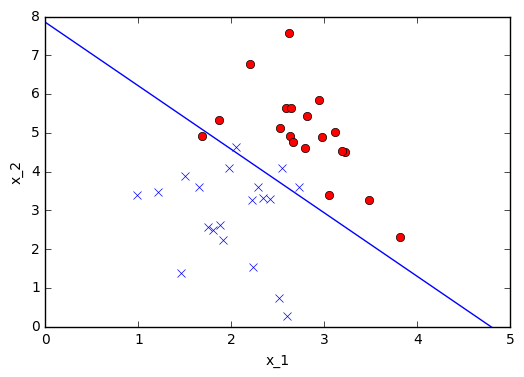

In [14]:
w = np.array([2., 1.])
b = -8.

h = 0.0001
alpha = 0.01

for i in range(30):
    loss1 = loss_lr(xp, xn, np.array([w[0]-h, w[1]]), b)
    loss2 = loss_lr(xp, xn, np.array([w[0]+h, w[1]]), b)
    diff = (loss2 - loss1) / (2 * h)
    w[0] = w[0] - alpha * diff

    loss1 = loss_lr(xp, xn, np.array([w[0], w[1]-h]), b)
    loss2 = loss_lr(xp, xn, np.array([w[0], w[1]+h]), b)
    diff = (loss2 - loss1) / (2 * h)
    w[1] = w[1] - alpha * diff

    loss1 = loss_lr(xp, xn, w, b-h)
    loss2 = loss_lr(xp, xn, w, b+h)
    diff = (loss2 - loss1) / (2 * h)
    b = b - alpha * diff

    print('[', i, '] w_1 :', w[0], 'w_2 :', w[1], ' b:', b, ' loss:', loss_lr(xp, xn, w, b))

plt.xlim(0, 5)
plt.ylim(0, 8)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.plot(x1p, x2p, 'ro')
plt.plot(x1n, x2n, 'bx')

x = arange(0, 5, 0.1)
y = (-w[0] * x - b) / w[1]
plt.plot(x, y)